## Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Challenge 1
## Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [39]:
x = 11
def roll(x):
    return random.choices(range(1,7), k = x)
dice = pd.DataFrame(roll(x), columns=['Value'], index=range(1, x+1))
sorted_dice = dice.sort_values('Value')
sorted_dice

,Value
1,1
3,1
6,1
4,2
11,3
9,4
2,5
5,5
7,5
8,5


## Plot the results sorted by value.

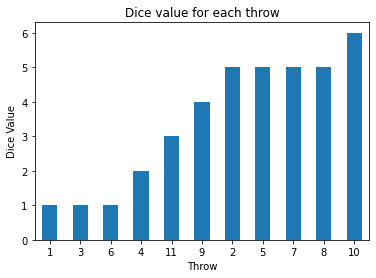

In [40]:
sorted_dice[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xlabel('Throw')
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

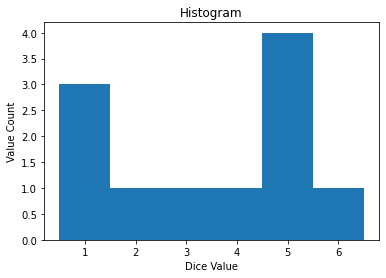

In [41]:
bins = [n + 0.5 for n in range(0,7)];
dice.hist(bins=bins, grid=False);
plt.xlabel('Dice Value');
plt.ylabel('Value Count');
plt.title('Histogram');
plt.show();

# Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

## Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [42]:
def mean_dice(dice):
    return dice['Value'].sum() / len(dice['Value'])
mean_dice(dice)

3.4545454545454546

## 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [43]:
def mean_2(dice):
    x = dice['Value'].value_counts().values
    y = dice['Value'].value_counts().index
    return sum(x * y) / len(dice['Value'])
mean_2(dice)

3.4545454545454546

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [85]:
def median_cal(dice):
    x = dice['Value'].sort_values(ascending = True).values
    if len(dice['Value'].sort_values(ascending = True)) % 2 != 0:
        return print(dice['Value'].sort_values(ascending = True)[(len(dice['Value'].sort_values(ascending = True)) - 1)/2]) 
    
    
def median_calculation(dice):
    if len(dice['Value']) % 2 == 0:
        return (dice['Value'][len(dice) // 2] + dice['Value'][(len(dice) // 2) + 1]) / 2
    return dice['Value'][(len(dice) // 2) + 1]

In [89]:
median_calculation(dice)

1

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [94]:
def reset_df_indexes(df):
    df = df.reset_index(drop=True)
    df.index = range(1,len(df)+1)
    return df


def quartiles_calculation(df):
    Q2 = median_calculation(df)
    index = len(sorted_dice['Value']) // 2
    if len(df['Value']) % 2 == 0:
        lower_df = df.iloc[0:index]
        upper_df = df.iloc[index:]
    else:
        lower_df = df.iloc[0:index-1]
        upper_df = df.iloc[index+1:]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

In [95]:
quartiles_calculation(dice)

(3.0, 1, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [112]:
dice

,Roll,Value
0,0,1
1,1,2
2,2,6
3,3,1
4,4,6
...,...,...
95,95,4
96,96,6
97,97,1
98,98,3


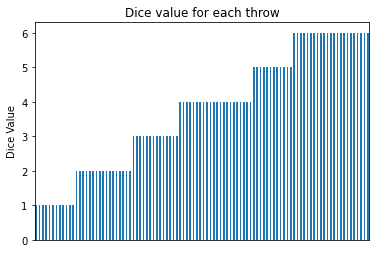

In [113]:
dice = pd.read_csv('roll_the_dice_hundred.csv', index_col = 0)
dice.columns = ['Roll', 'Value']
dice = dice.sort_values('Value',ascending = True)


dice[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [ ]:
"""
proggresive count of values.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [114]:
def mean_dice(dice):
    return dice['Value'].sum() / len(dice['Value'])
mean_dice(dice)

3.74

#### 3.- Now, calculate the frequency distribution.


In [127]:
d_freq = dice['Value'].value_counts(sort = False)
d_freq

1    12
2    17
3    14
4    22
5    12
6    23
Name: Value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(0.5, 1.0, 'Histogram')

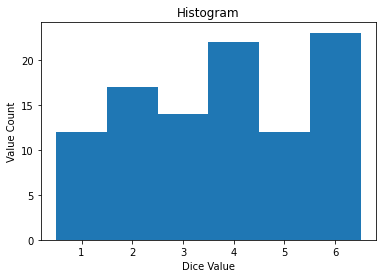

In [128]:
bins = [n + 0.5 for n in range(0,7)]
dice['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

In [ ]:
"""
thats possible because we have a 'balance' bewtween the data , pulling the mean next to 4.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [3]:
dice1 = pd.read_csv('roll_the_dice_thousand.csv')
dice1

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


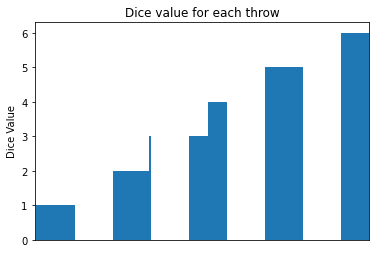

In [5]:
dice = pd.read_csv('roll_the_dice_thousand.csv', index_col = 0)
dice.columns = ['Roll', 'Value']
dice = dice.sort_values('Value',ascending = True)


dice[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

In [6]:
def mean_dice(dice):
    return dice['Value'].sum() / len(dice['Value'])
mean_dice(dice)

3.447

In [8]:
d_freq = dice['Value'].value_counts(sort = False)
d_freq

1    175
2    167
3    175
4    168
5    149
6    166
Name: Value, dtype: int64

Text(0.5, 1.0, 'Histogram')

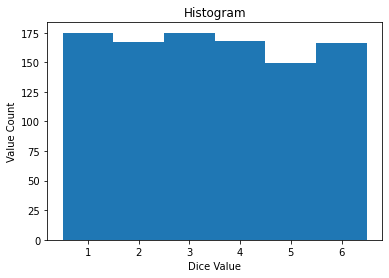

In [7]:
bins = [n + 0.5 for n in range(0,7)]
dice['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

In [ ]:
"""
The mean and the distribution
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [9]:
x = pd.read_csv('ages_population.csv')

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [14]:
x_freq = x['observation'].value_counts(sort = True)
x_freq

39.0    45
41.0    36
30.0    34
35.0    33
43.0    32
        ..
70.0     1
71.0     1
7.0      1
69.0     1
73.0     1
Name: observation, Length: 72, dtype: int64

Text(0.5, 1.0, 'Histogram')

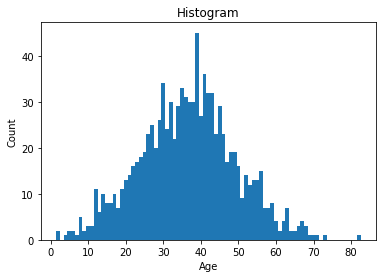

In [15]:
max_range = int(x['observation'].max()) + 1
min_range = int(x['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
x['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [19]:
x['observation'].mean()

36.56

In [20]:
x['observation'].std()

12.816499625976762

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [21]:
y = pd.read_csv('ages_population2.csv')
y

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [22]:
y_freq = y['observation'].value_counts(sort = True)
y_freq

28.0    139
27.0    125
26.0    120
29.0    115
25.0     98
30.0     90
24.0     78
31.0     61
23.0     41
22.0     35
32.0     31
33.0     22
21.0     17
20.0     13
34.0      7
35.0      3
19.0      3
36.0      2
Name: observation, dtype: int64

Text(0.5, 1.0, 'Histogram')

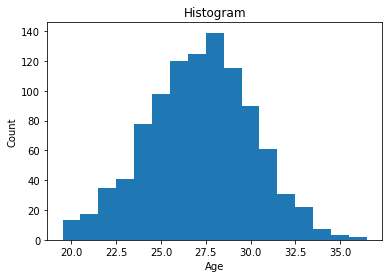

In [23]:
max_range = int(y['observation'].max()) + 1
min_range = int(y['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
y['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [25]:
'''
Yes, the STD.
'''

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [26]:
y.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [27]:
x.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
The people from Y are younger than 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [28]:
z = pd.read_csv('ages_population3.csv')
z

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [30]:
z_freq = z['observation'].value_counts(sort = True)
z_freq

32.0    37
35.0    31
37.0    31
39.0    29
36.0    26
        ..
76.0     1
9.0      1
1.0      1
5.0      1
7.0      1
Name: observation, Length: 75, dtype: int64

Text(0.5, 1.0, 'Histogram')

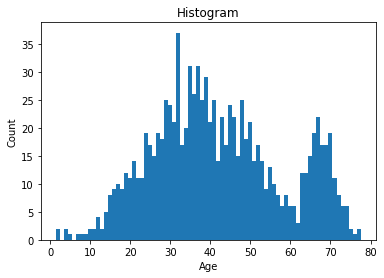

In [29]:
max_range = int(z['observation'].max()) + 1
min_range = int(z['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
z['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [31]:
z.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
People getting older.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [44]:
z['observation'].quantile(0.25)

30.0

In [43]:
z['observation'].quantile(0.75)

53.0

In [42]:
z['observation'].quantile(0.50)

40.0

In [41]:
z['observation'].quantile(0.10)

22.0

In [ ]:
"""
high difference between the mean and the median. More people older with high percentile 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [40]:
z['observation'].quantile(0.85)

64.0

In [ ]:
"""
More older.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [39]:
final = pd.concat([x['observation'], 
                        y['observation'], 
                        z['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
final.describe()

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [ ]:
"""
The people from df3 tend to be older than the other while the df2 is the 'youngest' place. Also, the deviation for df3 is higher , what means more people with differente ages.
"""